# Unraveling the Mystery of Childbed Fever: A Modern Take on Dr. Semmelweis' 19th Century Data

## Setup and Context
### Introduction

Dr. Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital.
In the past people thought of illness as caused by "bad air" or evil spirits.
But in the 1800s doctors started looking more at anatomy, doing autopsies and started making arguments based on data.
Dr. Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital.
Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src="https://i.imgur.com/gugIA5r.png" width=700>

The primary objective is to analyze the data gathered by Dr. Semmelweis and determine the cause of the elevated mortality rate among women.

**Main questions to answer:**
1. What caused the elevated mortality rate among women up until 1846? 
2. Did the procedure introduced by Dr. Semmelweis lead to a reduction in the death rate among women?

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')

# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', parse_dates=['date'])

# Preliminary Data Exploration

In [4]:
print(df_yearly.info())
df_yearly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes
None


year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2

In [5]:
print(df_monthly.info())
df_monthly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB
None


date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2
..        ...     ...     ...
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

[98 rows x 3 columns]

* Dataset covers the years 1841 to 1849.
* The two tables report the total number of births and the total number of deaths.
* The yearly data breaks the number of birthds and deaths down by clinic, but only for the years 1841 to 1846.
* Yearly data contains 12 entries, while monthly data consists of 98 entries.
* No issues with the data type in both tables.

### Check for Nan Values and Duplicates

In [6]:
print(f'Yearly dataset has NaN values: {df_yearly.isna().values.any()}')
print(f'Monthly dataset has NaN values: {df_monthly.isna().values.any()}')
print(f'Yearly dataset has duplicates: {df_yearly.duplicated().values.any()}')
print(f'Monthly dataset has duplicates: {df_monthly.duplicated().values.any()}')

Yearly dataset has NaN values: False
Monthly dataset has NaN values: False
Yearly dataset has duplicates: False
Monthly dataset has duplicates: False


The dataset appears to be clean.

### Descriptive Statistics

In [7]:
df_monthly.describe()

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

In [8]:
df_yearly.describe()

year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00

On average there were about 267 births and 22.47 deaths per month.

### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna?

In [9]:
death_rate = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {death_rate:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

In [10]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

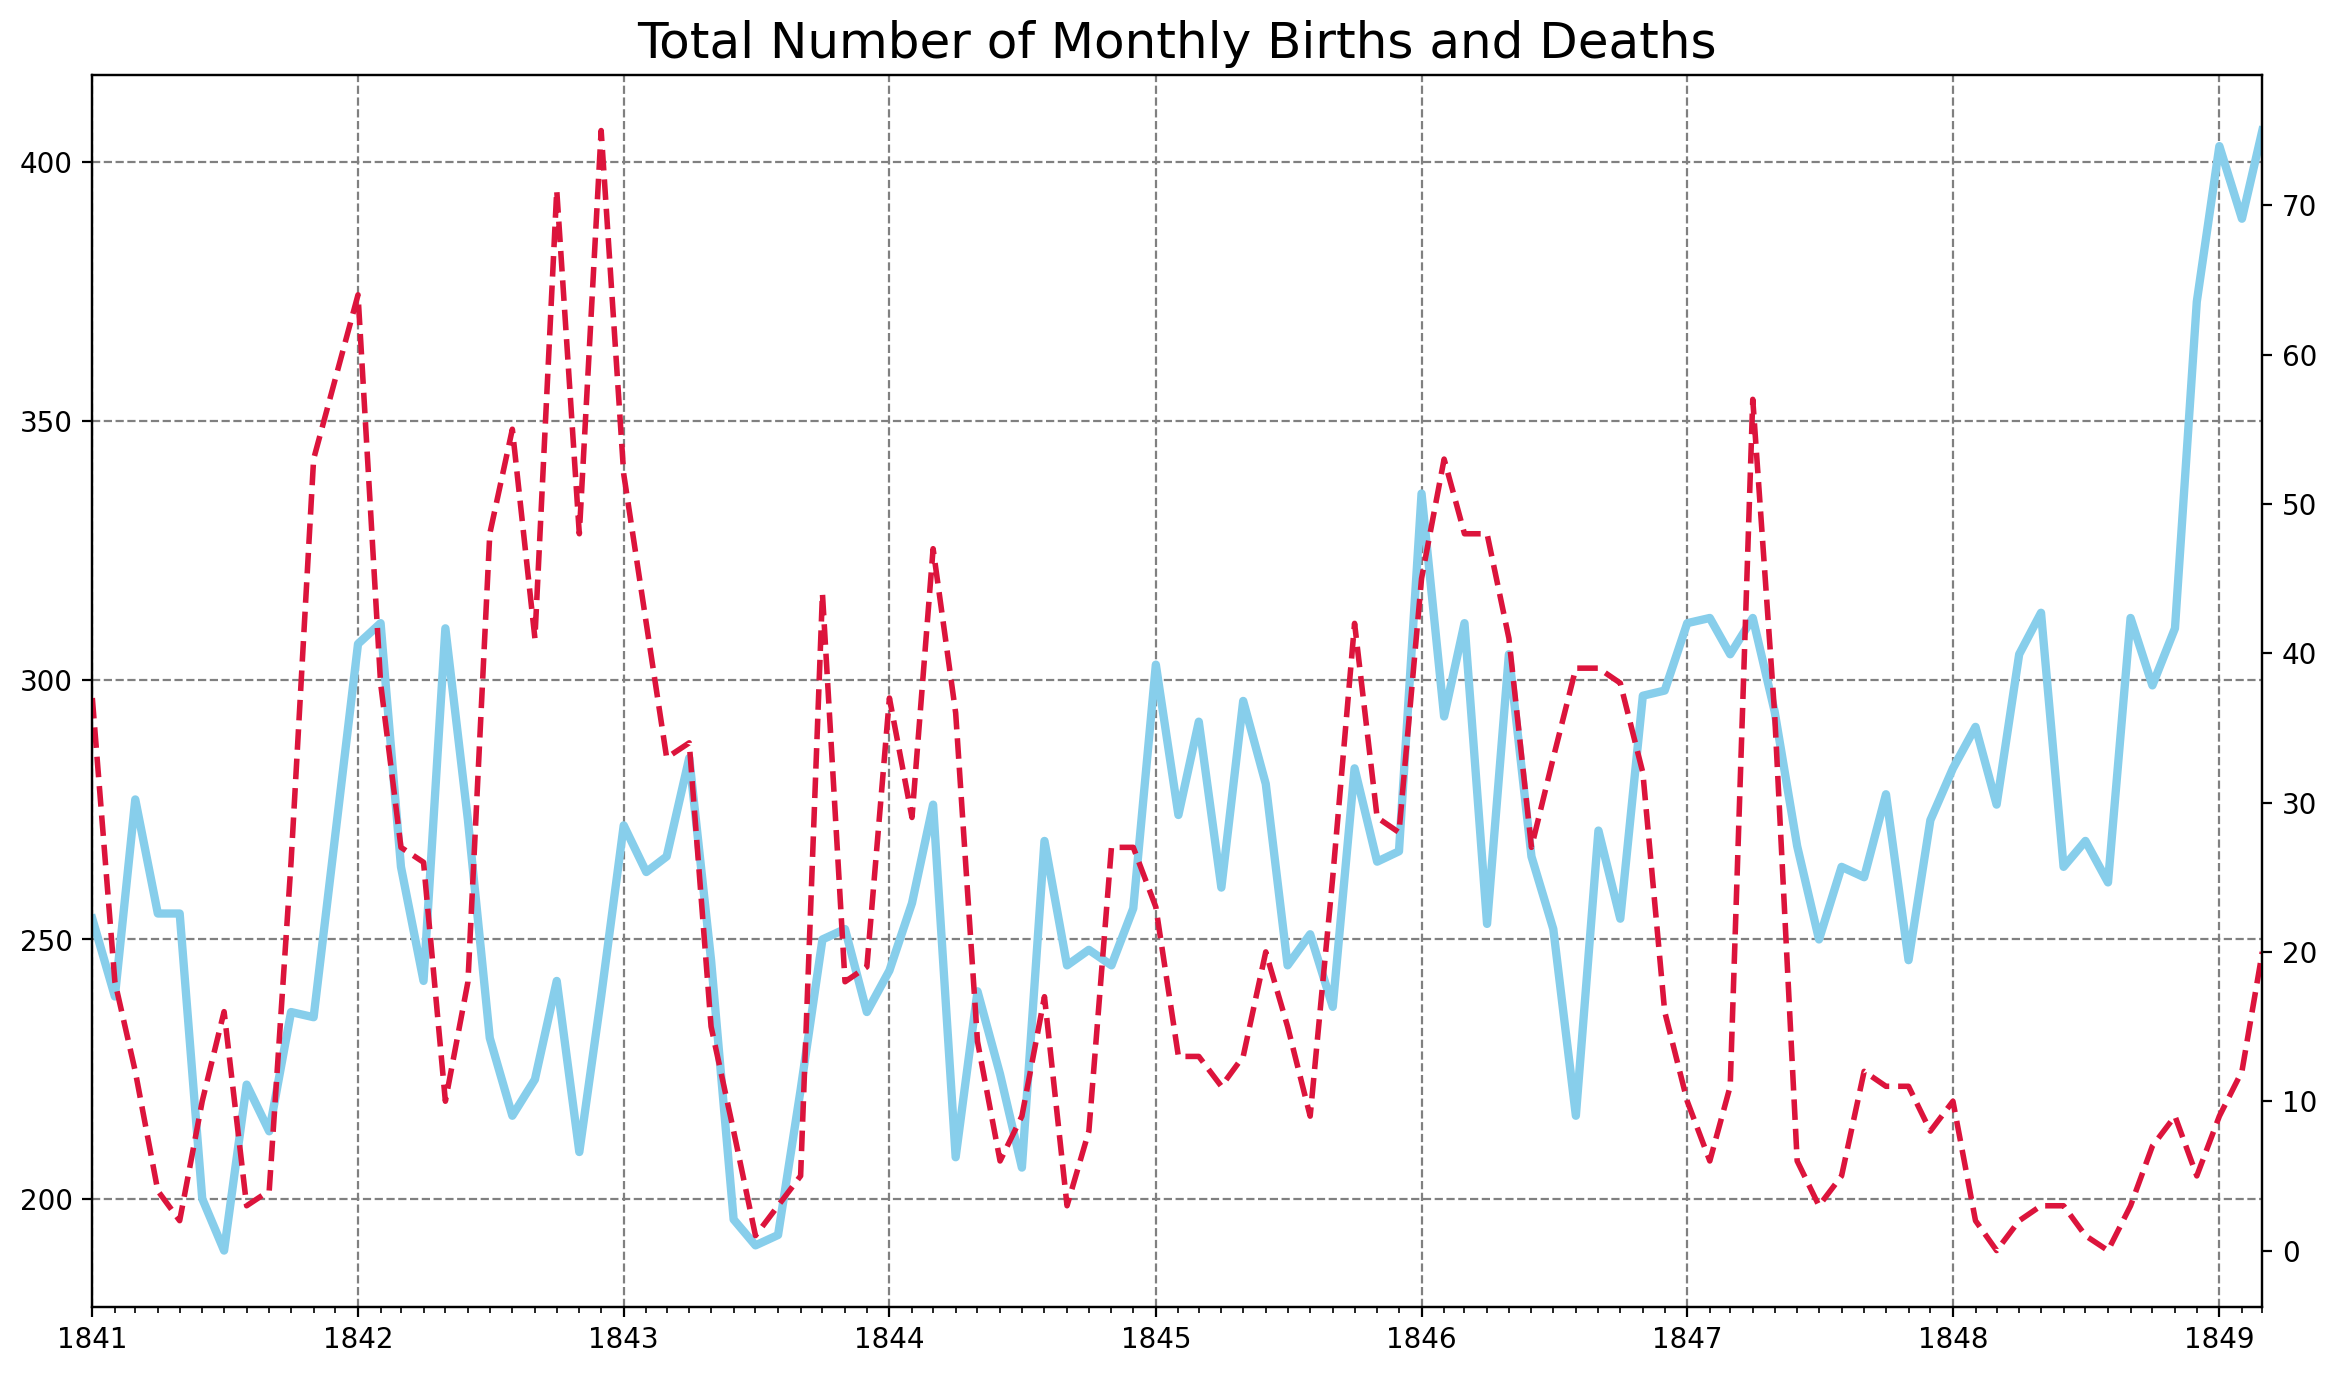

In [11]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle='--')

plt.show()

Something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births! 

# The Yearly Data Split by Clinic

There are two maternity wards at the Vienna General Hospital: clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, and clinic 2 was staffed by female midwives.

In [12]:
line = px.line(df_yearly,
              x='year',
              y='births',
              color='clinic',
              title='Total Yearly Births by Clinic')
line.show()

* More and more women gave birth at the hospital over the years.
* Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

In [13]:
line = px.line(df_yearly,
              x='year',
              y='deaths',
              color='clinic',
              title='Total Yearly Deaths by Clinic')
line.show()

* Not only were more people born in clinic 1, more people also died in clinic 1.
* To compare apples and apples, we need to look at the proportion of deaths per clinic.

### Calculate the Proportion of Deaths at Each Clinic

In [14]:
# Adding a column called "pct_deaths"
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [15]:
# Average death rate for the entire time period by clinic

clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%')

clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%')

Average death rate in clinic 1 is 9.92%
Average death rate in clinic 2 is 3.88%


The average death rate for clinic 1 throughout the entire time period is 2.6 times higher than that of clinic 2, which was managed by midwives and had a death rate of 3.88%. The question arises: why is this the case?

### Plotting the Proportion of Yearly Deaths by Clinic

In [16]:
line = px.line(df_yearly,
              x='year',
              y='pct_deaths',
              color='clinic',
              title='Proportion of Yearly Deaths by Clinic')
line.show()

* 1842 was a rough year. About 16% of women died in clinic 1 and about 7.6% of women died in clinic 2.
* Still, clinic 2 had a consistently lower death rate than clinic 1.

### Historical reference

This insight puzzled and frustrated Dr Semmelweis.

At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell 🔔. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell 🔕. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died. 😮

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied.  This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.

In June 1847, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments not just with soap and water but with a chlorine solution (he didn't know it at the time, but chlorine is an amazing disinfectant). The reason Dr Semmelweis actually chose the chlorine was that he wanted to get rid of any smell on doctors' hands after an autopsy. No one knew anything about bacteria, germs or viruses at the time.

# The Effect of Handwashing

In [17]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [18]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births
df_monthly.head(3)

date  births  deaths  pct_deaths
0 1841-01-01     254      37        0.15
1 1841-02-01     239      18        0.08
2 1841-03-01     277      12        0.04

In [19]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [20]:
bw_average = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_average = after_washing.deaths.sum() / after_washing.births.sum() * 100

print(f'Average death rate before June 1847 was {bw_average:.3}%')
print(f'Average death rate after June 1847 was {aw_average:.3}%')

Average death rate before June 1847 was 10.5%
Average death rate after June 1847 was 2.15%


The death rate per birth dropped dramatically after handwashing started - from close to 10.53% to 2.15%.

### Calculate a Rolling Average of the Death Rate

In [31]:
# Set the dates as the index in order to avoid the date column being dropped during the calculation
roll_df = before_washing.set_index('date')

roll_df = roll_df.rolling(window=6).mean()
roll_df[:7]

births  deaths  pct_deaths
date                                  
1841-01-01     NaN     NaN         NaN
1841-02-01     NaN     NaN         NaN
1841-03-01     NaN     NaN         NaN
1841-04-01     NaN     NaN         NaN
1841-05-01     NaN     NaN         NaN
1841-06-01  246.67   13.83        0.06
1841-07-01  236.00   10.33        0.05

### Highlighting Subsections of a Line Chart

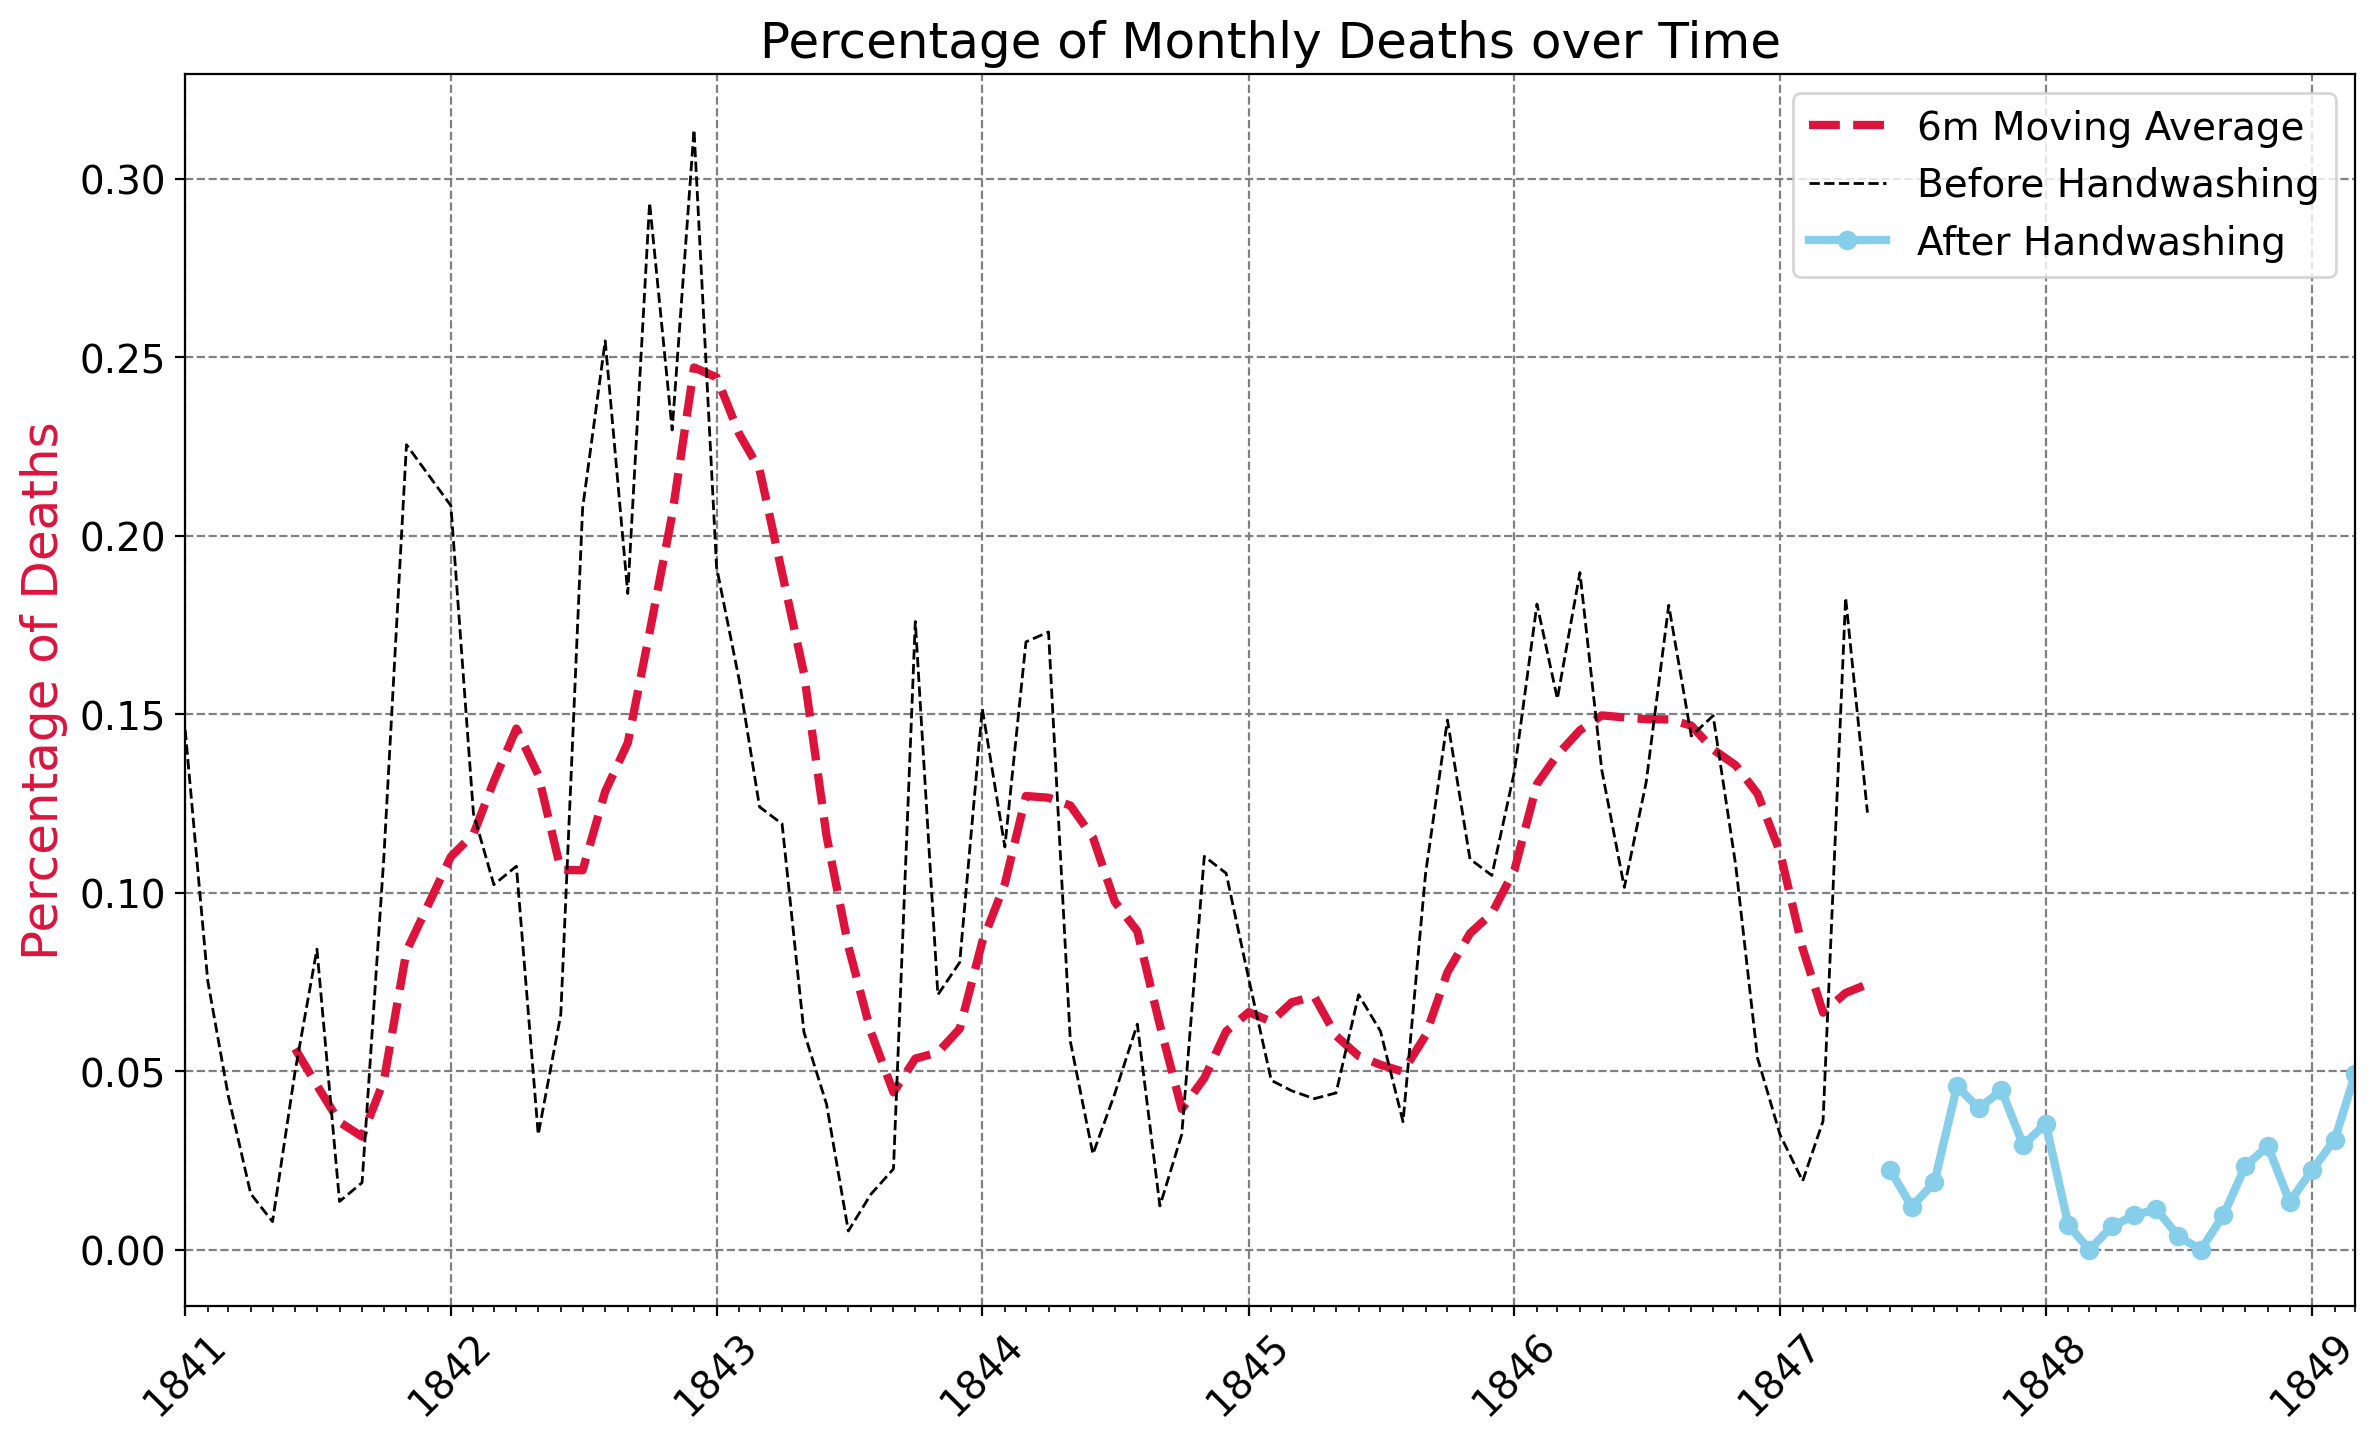

In [22]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

# Plot the three different lines on the same axis
ax = plt.gca()

# Use Locators
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.grid(color='grey', linestyle='--')

ma_line, = plt.plot(roll_df.index,
                   roll_df.pct_deaths,
                   color='crimson',
                   linestyle='--',
                   linewidth=3,
                   label='6m Moving Average',)

bw_line, = plt.plot(before_washing.date,
                   before_washing.pct_deaths,
                   color='black',
                   linewidth=1,
                   linestyle='--',
                   label='Before Handwashing',)

aw_line, = plt.plot(after_washing.date,
                    after_washing.pct_deaths,
                    color='skyblue',
                    linewidth=3,
                    marker='o',
                    label='After Handwashing',)

ax.legend(handles=[ma_line, bw_line, aw_line], fontsize=14)

plt.show()

The death rate per birth dropped dramatically after handwashing started.

### Statistics: Calculate the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [23]:
avg_dr_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_dr_before:.3}%')

avg_dr_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth after handwashing: {avg_dr_after:.3}%')

mean_diff = avg_dr_before - avg_dr_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.2}pp')

times = avg_dr_before / avg_dr_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%
Chance of death during childbirth after handwashing: 2.11%
Handwashing reduced the monthly proportion of deaths by 8.4pp
This is a 5.0x improvement!


### How the Death Rate Changed Before and After Handwashing: Box Plots

In [24]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')
df_monthly[:3]

date  births  deaths  pct_deaths washing_hands
0 1841-01-01     254      37        0.15            No
1 1841-02-01     239      18        0.08            No
2 1841-03-01     277      12        0.04            No

In [25]:
box = px.box(df_monthly,
             x='washing_hands',
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?',
            )

box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',
                 )

box.show()

The plot shows us the same data as the chart before, but from a different perspective.

* The massive spike in deaths in late 1842, when over 30% of women who gave birth that month died in hospital.
* We also see is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too.

Let's take a look at a histogram to get a better sense of the distribution.

### Monthly Distribution of Outcomes

In [26]:
hist = px.histogram(df_monthly,
                   x='pct_deaths',
                   color='washing_hands',
                   histnorm='percent',
                   marginal='box', # Just for fun, display a box plot on the top of the histogram
                   nbins=30,
                   opacity=0.6,)

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                  yaxis_title='Count')

hist.show()

We have only about 98 data points or so, so our histogram looks a bit jagged. It's not a smooth bell-shaped curve. However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).

### Kernel Density Estimate (KDE) to visualise a smooth distribution

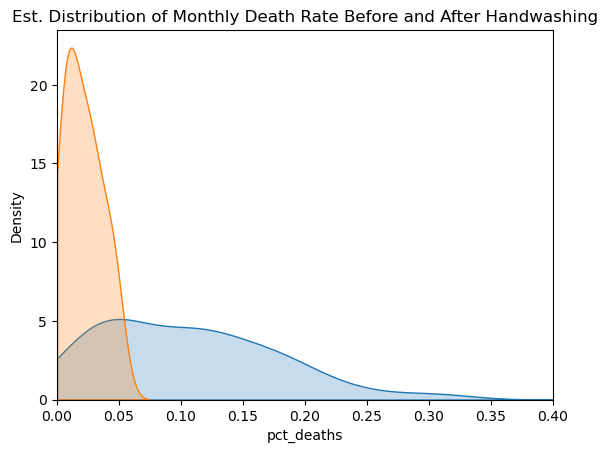

In [27]:
# plt.figure(dpi=200)

sns.kdeplot(before_washing.pct_deaths,
            shade=True,
            clip=(0,1))

sns.kdeplot(after_washing.pct_deaths,
            shade=True,
            clip=(0,1))

plt.xlim(0, 0.40)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')

plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.

### T-Test to Show Statistical Significance

In [28]:
import scipy.stats as stats

In [29]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths,
                                  b=after_washing.pct_deaths)
print(f'p-value: {p_value:.10f}')
print(f't-statistic: {t_stat:.4}')

p-value: 0.0000002985
t-statistic: 5.512


When we calculate the p_value we see that it is 0.00002985% which is far below even 1%. In other words, the difference in means is **highly statistically significant**.